In [1]:
#task9 Utilize natural language processing techniques to extract meaningful insights from movie overviews.

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
from sklearn.metrics.pairwise import cosine_similarity

In [3]:
# Download necessary NLTK data
nltk.download('punkt')  # Tokenization
nltk.download('stopwords')  # Stop words

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sangheum\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sangheum\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
# Load dataset
df = pd.read_csv('TMDB_movie_dataset_v11.csv')

In [5]:
# Combine all movie overviews 
text = " ".join(df['overview'].astype(str))

In [6]:
# Handle missing values 
df['overview'] = df['overview'].fillna('')

# Handle missing values in genres
df['genres'] = df['genres'].fillna('')

In [7]:
# Randomly sample 1% of the data
df = df.sample(frac=0.01, random_state=42)

In [8]:
# Separate genres into multiple rows for proper grouping
df['genres'] = df['genres'].fillna('').str.replace(' ', '')  
df = df.assign(genres=df['genres'].str.split(',')).explode('genres')
df = df[df['genres'] != '']

In [9]:
# Text preprocessing 
def preprocess_text(text):
    additional_stopwords = {'film', 'life', 'story', 'young', 'new', 'world', 'man', 'woman','animation','animated','time'}
    stop_words = set(stopwords.words('english')).union(additional_stopwords)  # Stopwords
    tokens = word_tokenize(text.lower())  # Tokenize and convert to lowercase
    tokens = [word for word in tokens if word.isalnum()]  # Keep only alphanumeric words
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    tokens = [word for word in tokens if len(word) > 2]  # Remove short words
    return " ".join(tokens)

In [10]:
# Preprocess text in overview column
df['processed_overview'] = df['overview'].apply(preprocess_text)

In [11]:
# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=50, stop_words='english', max_df=0.5,  min_df=0.01)
tfidf_matrix = vectorizer.fit_transform(df['processed_overview'])

# Display top 20 TF-IDF features
print("Top 20 TF-IDF features:")
print(vectorizer.get_feature_names_out())

# Extract and average TF-IDF scores
tfidf_features = vectorizer.get_feature_names_out()
tfidf_scores = tfidf_matrix.mean(axis=0).A.flatten()
tfidf_df = pd.DataFrame({'word': tfidf_features, 'score': tfidf_scores})

# Sort and take top 10 TF-IDF features
top_tfidf = tfidf_df.nlargest(10, 'score')

Top 20 TF-IDF features:
['beautiful' 'best' 'boy' 'children' 'city' 'daughter' 'day' 'death'
 'documentary' 'falls' 'family' 'father' 'finds' 'friend' 'friends' 'gets'
 'girl' 'goes' 'group' 'help' 'home' 'house' 'husband' 'journey' 'like'
 'little' 'live' 'lives' 'love' 'make' 'mother' 'music' 'night' 'old'
 'people' 'place' 'relationship' 'school' 'series' 'set' 'short' 'son'
 'soon' 'takes' 'town' 'war' 'way' 'wife' 'work' 'years']


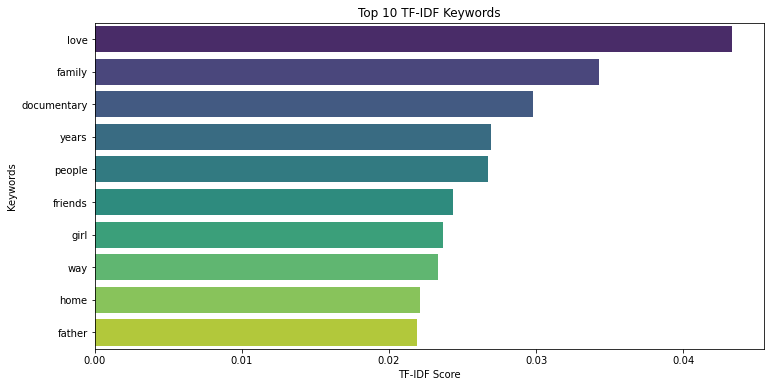

In [12]:
# Bar plot 
plt.figure(figsize=(12, 6))
sns.barplot(x='score', y='word', data=top_tfidf, palette='viridis')
plt.title('Top 10 TF-IDF Keywords')
plt.xlabel('TF-IDF Score')
plt.ylabel('Keywords')
plt.show()

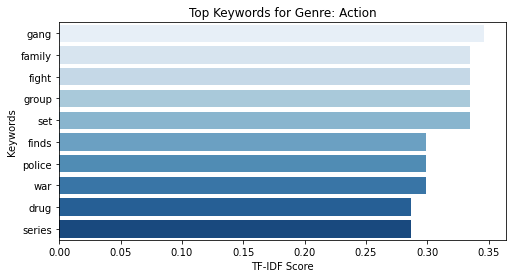

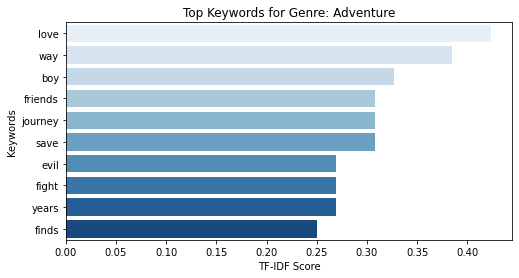

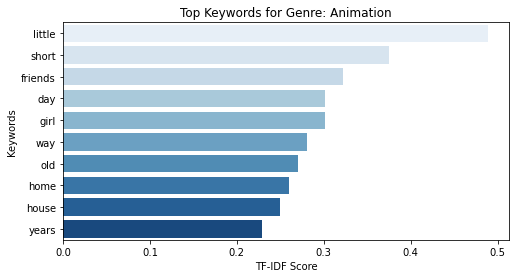

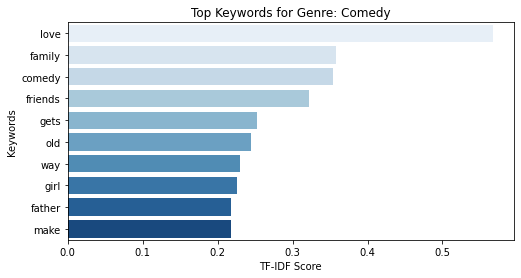

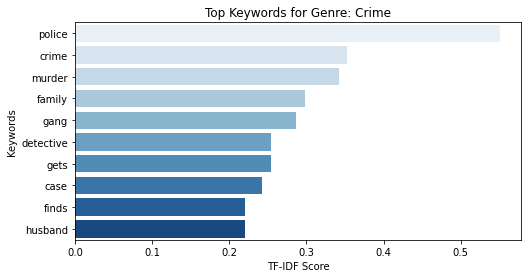

In [13]:
# Group overviews by genres
genre_keywords = df.groupby('genres')['processed_overview'].apply(
    lambda x: " ".join(x)
).reset_index()

# Select top 5 genres
top_genres = genre_keywords.head(5)

# TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=10, stop_words='english')

# Extract top keywords 
for _, row in top_genres.iterrows():
    genre = row['genres'] 
    overview_text = row['processed_overview']  # Combine overviews
    
    # Apply TF-IDF vectorization
    tfidf_matrix = vectorizer.fit_transform([overview_text])
    tfidf_features = vectorizer.get_feature_names_out()
    tfidf_scores = tfidf_matrix.toarray().flatten()
    
    tfidf_df = pd.DataFrame({
        'word': tfidf_features,
        'score': tfidf_scores
    }).sort_values(by='score', ascending=False)
    
    # Plot
    plt.figure(figsize=(8, 4))
    sns.barplot(x='score', y='word', data=tfidf_df, palette='Blues')
    plt.legend([], [], frameon=False)
    plt.title(f'Top Keywords for Genre: {genre}')
    plt.xlabel('TF-IDF Score')
    plt.ylabel('Keywords')
    plt.show()


In [14]:
df.head()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords,processed_overview
698031,1214602,Aspach,0.0,0,Released,2023-11-28,0,0,False,NaN,...,,1.400,/rWsoXIUDHonz4DNk9LTLDyDQE3y.jpg,NaN,Drama,NaN,Germany,German,NaN,
698031,1214602,Aspach,0.0,0,Released,2023-11-28,0,0,False,NaN,...,,1.400,/rWsoXIUDHonz4DNk9LTLDyDQE3y.jpg,NaN,Comedy,NaN,Germany,German,NaN,
687583,1197206,Guhya,0.0,0,Released,1997-01-01,0,55,False,/cMKEDntGAbtEgHfb1Z6T0PCS1kC.jpg,...,A film explores feminine sexual symbols and ri...,0.600,/vs9GCtf6290PpV1DaOKSXSICHtq.jpg,NaN,Documentary,NaN,India,"Assamese, English, Kannada, Malayalam",NaN,explores feminine sexual symbols rituals traci...
868332,85562,Nightmare Asylum,0.0,0,Released,1992-01-01,0,69,False,NaN,...,A woman struggles in a nightmare world.,0.600,/p9mJJNykTkTtr7O7MSAVRFhv7gS.jpg,NaN,Horror,NaN,NaN,English,shot on video,struggles nightmare
307022,389915,Laputa,5.0,1,Released,1987-07-30,0,92,False,NaN,...,Extensive dialogue and the tight focus of a si...,1.182,/6V3JjGdsIsa3p82n9UreClqgoVE.jpg,NaN,Drama,Von Vietinghoff Filmproduktion (VVF),Germany,German,woman director,extensive dialogue tight focus single apartmen...


In [15]:
# Handle missing values
df['title'] = df['title'].fillna('')
df['overview'] = df['overview'].fillna('')

# Calculate cosine similarity matrix
if tfidf_matrix.shape[0] > 1:
    cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
    print("Cosine Similarity Matrix Calculated Successfully.")
else:
    print("Error: TF-IDF matrix has insufficient rows.")

# Define recommendation function
def get_recommendations(title, cosine_sim=cosine_sim):
    # Check if the movie exists
    if title.lower() not in df['title'].str.lower().values:
        print(f"Movie '{title}' not found in the dataset.")
        return pd.DataFrame(columns=['title', 'overview'])
    
    try:
        # Find the movie index
        idx = df[df['title'].str.lower() == title.lower()].index[0]

        # Validate cosine similarity matrix size
        if cosine_sim.shape[0] <= idx:
            print("Error: Similarity matrix size mismatch.")
            return pd.DataFrame(columns=['title', 'overview'])
        
        # Calculate similarity scores
        sim_scores = list(enumerate(cosine_sim[idx]))
        
        # Sort and get the top 10 movies
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
        sim_scores = sim_scores[1:11]  # Exclude the input movie itself
        movie_indices = [i[0] for i in sim_scores]
        
        # Return recommended movies
        return df[['title', 'overview']].iloc[movie_indices]
    
    except IndexError:
        print("Index error encountered during recommendation.")
        return pd.DataFrame(columns=['title', 'overview'])

# Get movie recommendations
movie_title = input("Enter a movie title: ")
recommendations = get_recommendations(movie_title)

if recommendations.empty:
    print("No recommendations found.")
else:
    print("\nRecommended Movies:")
    print(recommendations)
    print(recommendations)

Error: TF-IDF matrix has insufficient rows.


NameError: name 'cosine_sim' is not defined